In [1]:
__file__ = 'erosion_and_dilation.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP7_lib")

import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat

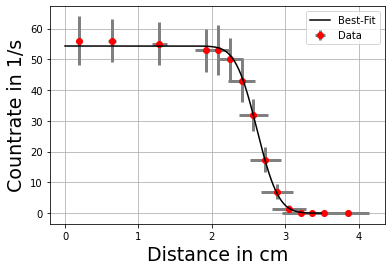

[[Model]]
    Model(erfc)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 39
    # data points      = 15
    # variables        = 3
    chi-square         = 0.38819799
    reduced chi-square = 0.03234983
    Akaike info crit   = -48.8143500
    Bayesian info crit = -46.6901994
[[Variables]]
    A:  27.1625935 +/- 0.28435073 (1.05%) (init = 25.907)
    B:  3.07559001 +/- 0.07560663 (2.46%) (init = 7.829)
    C:  8.04120949 +/- 0.21304857 (2.65%) (init = 17.657)
[[Correlations]] (unreported correlations are < 0.100)
    C(B, C) = 0.997
    C(A, C) = -0.396
    C(A, B) = -0.365


In [4]:
with open("Data/Data.txt") as tf:
    data = np.genfromtxt(tf).T


#minimum error value
data[2] = data[2].clip(0.1)



#annahme abstand quelle schirm 6.5 +-0.5 cm
xerr = np.full(len(data[0]),2.5)
laeng = up.uarray(data[0],xerr)
abst = ufloat(6.5,0.5)
for i in range(len(laeng)):
    laeng[i] = laeng[i]*abst/1013.25





data[0] = up.nominal_values(laeng)
xerr = up.std_devs(laeng)


res = f.erfc_fit(data[1],data[0],data[2])


plt.errorbar(data[0],data[1],yerr=data[2],xerr=xerr,fmt='o',ecolor='gray',color='r', elinewidth=3, capsize=0,zorder=5,label="Data")
plt.plot(np.arange(0,3.5,0.01),res.eval(x=np.arange(0,3.5,0.01)),zorder=10,color='k',linestyle='-',alpha=1,label="Best-Fit")

plt.xlabel("Distance in cm",fontsize=19)
plt.ylabel("Countrate in 1/s",fontsize=19)
plt.grid()
plt.legend()
plt.savefig("Results/reangedetermination.pdf")
plt.show()


print(res.fit_report())